In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
seasons = []
u20 = []
a21_25 = []
a26_30 = []
o31 = []

In [7]:
def CheckMinutes(year):
    site = f"https://fbref.com/en/comps/Big5/{year-1}-{year}/stats/players/{year-1}-{year}-Big-5-European-Leagues-Stats"
    page = pd.read_html(site)
    frame = page[0]
    frame.head()

    df = frame
    df.columns = df.columns.droplevel(0)

    df = df[df['Age'].notna()]
    df = df[df['Age'] != 'Age']
    df = df.sort_values(by=['Age'])
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    df['Min'] = df['Min'].astype(int)
    df['Age'] = df['Age'].astype(float)

    total_mins = df['Min'].sum()

    under20 = 0
    age21_25 = 0
    age26_30 = 0
    over31 = 0

    for index, row in df.iterrows():
        if row['Age'] <= 20:
            under20 = under20 + row['Min']
        elif row['Age'] <= 25:
            age21_25 = age21_25 + row['Min']
        elif row['Age'] <= 30:
            age26_30 = age26_30 + row['Min']
        elif row['Age'] > 30:
            over31 = over31 + row['Min']
    
    seasons.append(year + 1)
    u20.append(under20)
    a21_25.append(age21_25)
    a26_30.append(age26_30)
    o31.append(over31)

In [9]:
for i in range(2000, 2023):
    CheckMinutes(i)
    print(f"{i} is done")

2000 is done
2001 is done
2002 is done
2003 is done
2004 is done
2005 is done
2006 is done
2007 is done
2008 is done
2009 is done
2010 is done
2011 is done
2012 is done
2013 is done
2014 is done
2015 is done
2016 is done
2017 is done
2018 is done
2019 is done
2020 is done
2021 is done
2022 is done


In [10]:
df = list(zip(seasons, u20, a21_25, a26_30, o31))

In [13]:
df

[(2001, 247464, 1202102, 1359305, 500008),
 (2002, 225462, 1199601, 1367211, 520636),
 (2003, 238840, 1150898, 1379672, 536552),
 (2004, 194065, 1306518, 1429871, 513239),
 (2005, 233565, 1361481, 1341520, 516343),
 (2006, 281228, 1402778, 1379318, 536450),
 (2007, 288390, 1396120, 1353384, 565116),
 (2008, 270284, 1364026, 1402216, 566455),
 (2009, 272150, 1296849, 1496939, 538886),
 (2010, 223102, 1353579, 1516001, 511522),
 (2011, 271499, 1373371, 1427540, 531642),
 (2012, 252875, 1404206, 1410463, 537354),
 (2001, 247464, 1202102, 1359305, 500008),
 (2002, 225462, 1199601, 1367211, 520636),
 (2003, 238840, 1150898, 1379672, 536552),
 (2004, 194065, 1306518, 1429871, 513239),
 (2005, 233565, 1361481, 1341520, 516343),
 (2006, 281228, 1402778, 1379318, 536450),
 (2007, 288390, 1396120, 1353384, 565116),
 (2008, 270284, 1364026, 1402216, 566455),
 (2009, 272150, 1296849, 1496939, 538886),
 (2010, 223102, 1353579, 1516001, 511522),
 (2011, 271499, 1373371, 1427540, 531642),
 (2012, 252

In [15]:
df = pd.DataFrame(df, columns=['Season', '-20', '21-25', '26-30', '31+'])
df.head(5)

,Season,-20,21-25,26-30,31+
0,2001,247464,1202102,1359305,500008
1,2002,225462,1199601,1367211,520636
2,2003,238840,1150898,1379672,536552
3,2004,194065,1306518,1429871,513239
4,2005,233565,1361481,1341520,516343


In [69]:
df['Total'] = df['-20'] + df['21-25'] + df['26-30'] + df['31+']
df['-20Perc'] = df['-20'] / df['Total'] * 100
df['21-25Perc'] = df['21-25'] / df['Total'] * 100
df['26-30Perc'] = df['26-30'] / df['Total'] * 100
df['31+Perc'] = df['31+'] / df['Total'] * 100

In [70]:
df['TotalPerc'] = df['-20Perc'] + df['21-25Perc'] + df['26-30Perc'] + df['31+Perc']

In [71]:
df.head(5)

,Season,-20,21-25,26-30,31+,Total,-20Perc,21-25Perc,26-30Perc,31+Perc,TotalPerc
0,2001,247464,1202102,1359305,500008,3308879,7.478787,36.329585,41.080529,15.111100,100.0
1,2002,225462,1199601,1367211,520636,3312910,6.805558,36.209888,41.269186,15.715368,100.0
2,2003,238840,1150898,1379672,536552,3305962,7.224523,34.812802,41.732845,16.229830,100.0
3,2004,194065,1306518,1429871,513239,3443693,5.635375,37.939445,41.521442,14.903739,100.0
4,2005,233565,1361481,1341520,516343,3452909,6.764296,39.429970,38.851878,14.953855,100.0


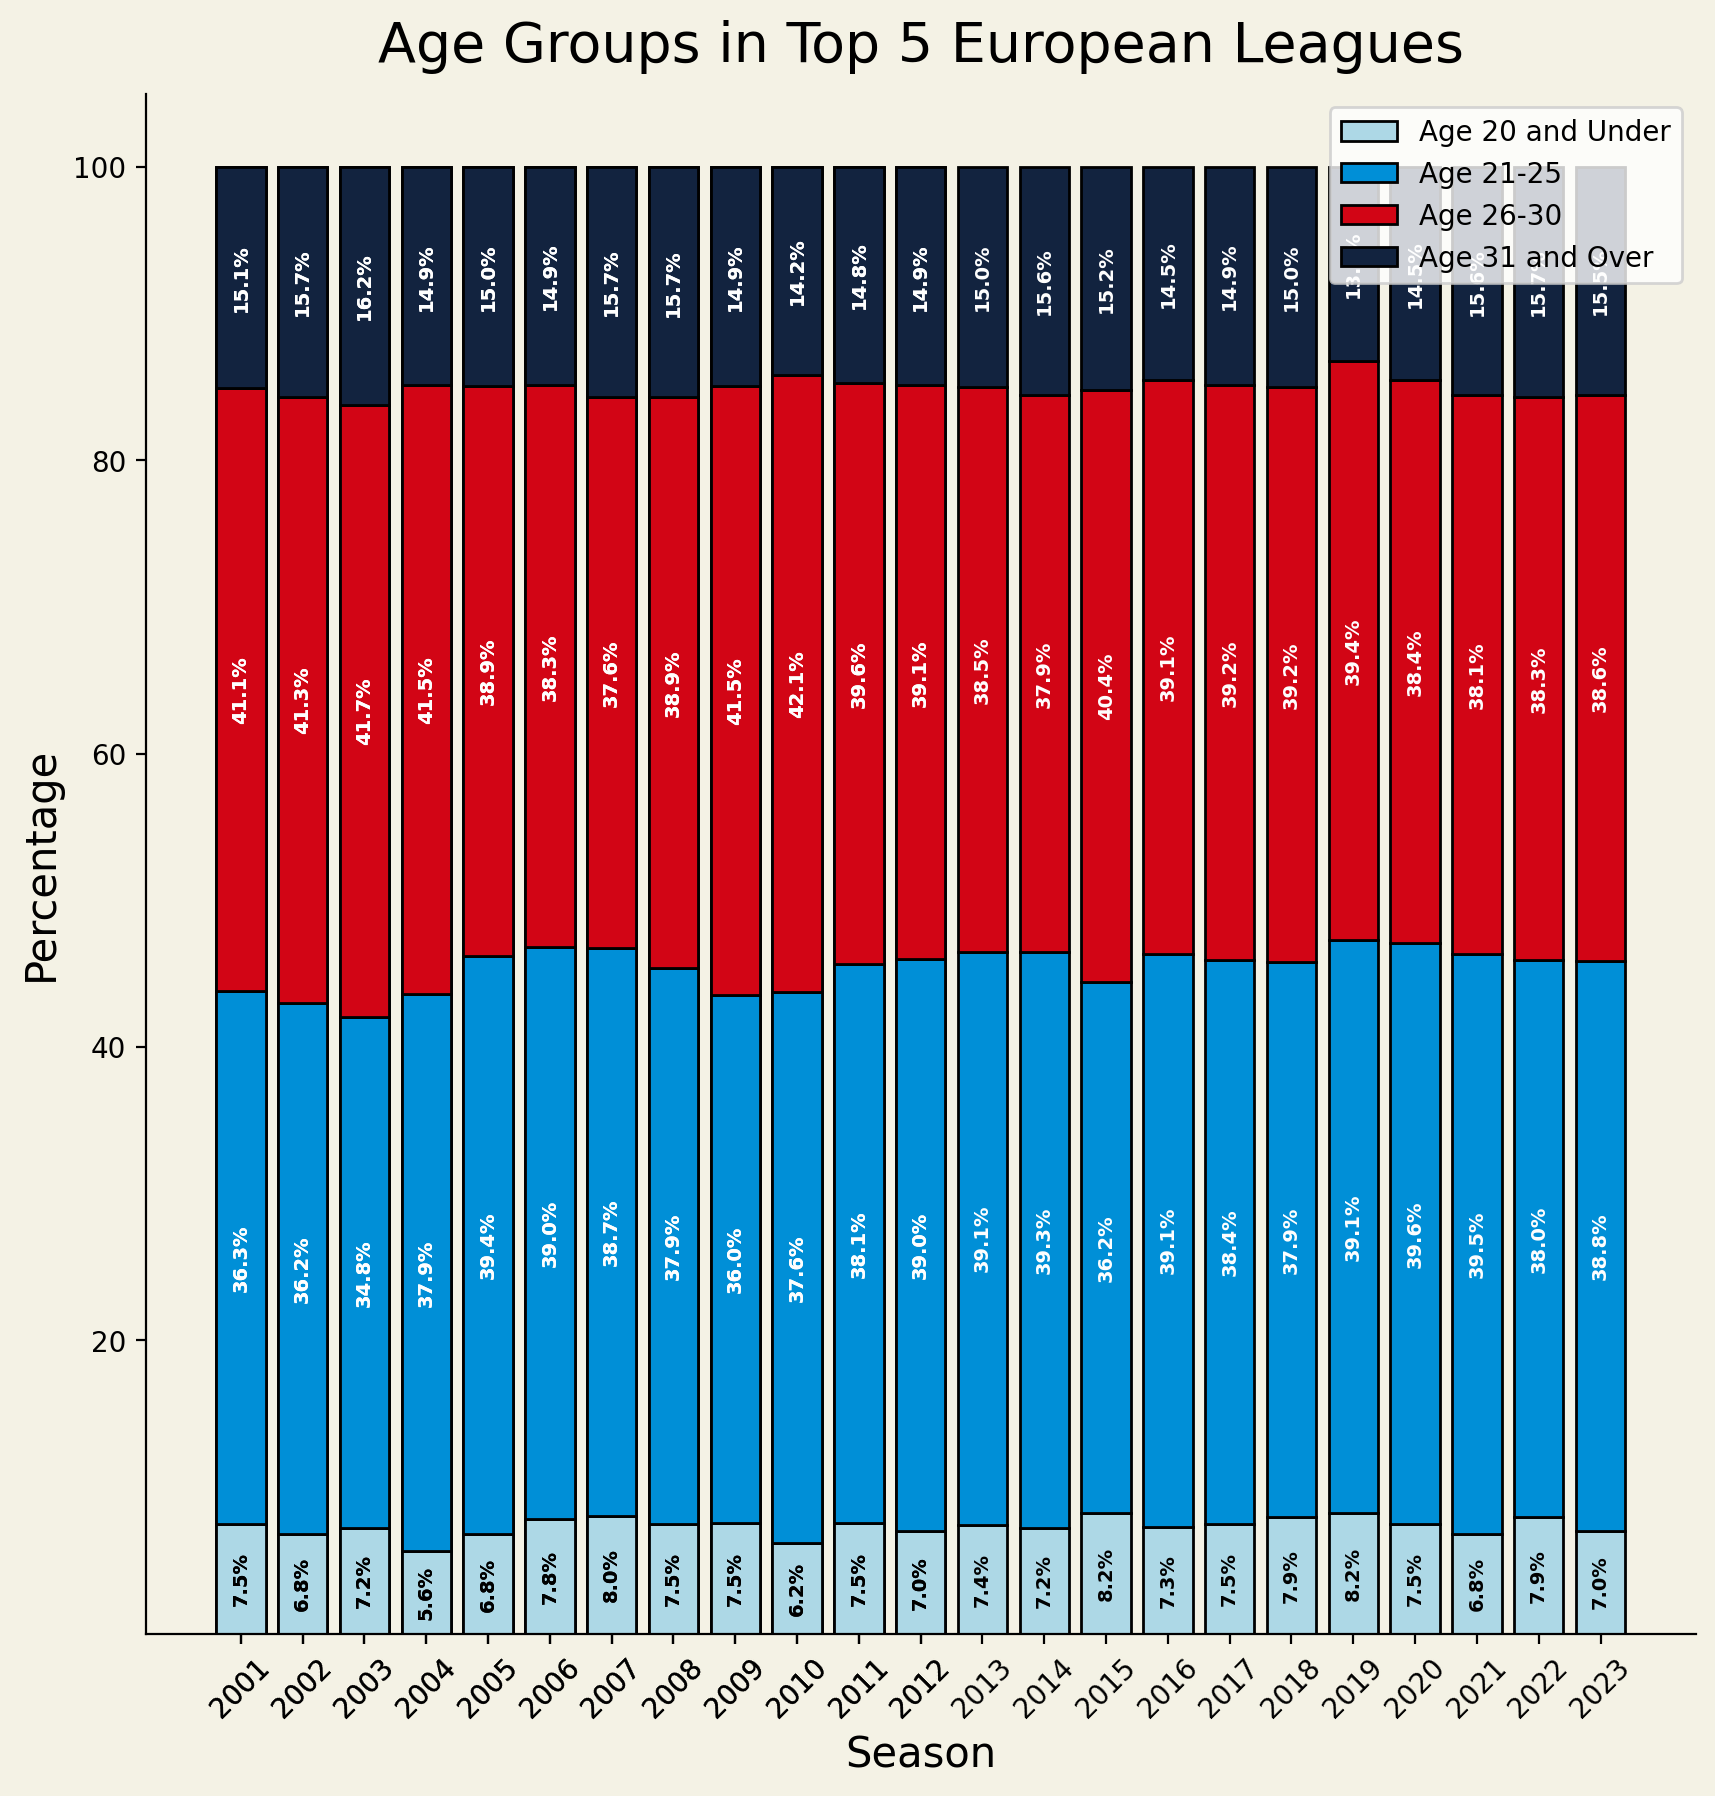

In [116]:
plt.figure(figsize = (10, 10), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Age Groups in Top 5 European Leagues", fontsize = 20, y = 1.01) 

ax.set_ylabel("Percentage", fontsize = 15)
ax.set_xlabel("Season", fontsize = 15)

ax.set_yticks([20, 40, 60, 80, 100])
ax.set_xticks(df['Season'])
ax.set_xticklabels(df['Season'], rotation=45)

ax.bar(df['Season'], df['-20Perc'], color = "lightblue", ec="black", label = "Age 20 and Under")
ax.bar(df['Season'], df['21-25Perc'], bottom=df['-20Perc'], color = "#008fd7", ec="black", label = "Age 21-25")
ax.bar(df['Season'], df['26-30Perc'], bottom=df['-20Perc']+df['21-25Perc'], color = "#d20515", ec="black", label = "Age 26-30")
ax.bar(df['Season'], df['31+Perc'], bottom=df['-20Perc']+df['21-25Perc']+df['26-30Perc'], color = "#12233f", ec="black", label = "Age 31 and Over")

for i in range(len(df)):
    ax.text(df['Season'][i], df['-20Perc'][i] / 2, str(round(df['-20Perc'][i],1)) + "%", fontweight="bold", rotation=90, fontsize=7, verticalalignment='center', horizontalalignment='center')
    ax.text(df['Season'][i], df['-20Perc'][i] + df['21-25Perc'][i] / 2, str(round(df['21-25Perc'][i],1)) + "%", color="white", fontweight="bold", rotation=90, fontsize=7, verticalalignment='center', horizontalalignment='center')
    ax.text(df['Season'][i], df['-20Perc'][i] + df['21-25Perc'][i] + df['26-30Perc'][i] / 2, str(round(df['26-30Perc'][i],1)) + "%", color="white", fontweight="bold", rotation=90, fontsize=7, verticalalignment='center', horizontalalignment='center')
    ax.text(df['Season'][i], df['-20Perc'][i] + df['21-25Perc'][i] + df['26-30Perc'][i] + df['31+Perc'][i] / 2, str(round(df['31+Perc'][i],1)) + "%", color="white", fontweight="bold", rotation=90, fontsize=7, verticalalignment='center', horizontalalignment='center')
    
ax.legend()